<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Working-with-a-3D-large-eddy-simulation-of-shallow-convection" data-toc-modified-id="Working-with-a-3D-large-eddy-simulation-of-shallow-convection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Working with a 3D large eddy simulation of shallow convection</a></span><ul class="toc-item"><li><span><a href="#The-simulation" data-toc-modified-id="The-simulation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The simulation</a></span></li><li><span><a href="#The-dataset-----netccdf" data-toc-modified-id="The-dataset-----netccdf-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The dataset  -- netccdf</a></span></li><li><span><a href="#liquid-water-cross-section-at-1-km" data-toc-modified-id="liquid-water-cross-section-at-1-km-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>liquid water cross section at 1 km</a></span></li></ul></li><li><span><a href="#Get-the-cloud-fraction-a-1-km-by-summing-all-cloudy-pixels" data-toc-modified-id="Get-the-cloud-fraction-a-1-km-by-summing-all-cloudy-pixels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the cloud fraction a 1 km by summing all cloudy pixels</a></span></li><li><span><a href="#raw-image-of-qn-at-1000-m" data-toc-modified-id="raw-image-of-qn-at-1000-m-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>raw image of qn at 1000 m</a></span><ul class="toc-item"><li><span><a href="#zoom-in-on--the-top-left-corner" data-toc-modified-id="zoom-in-on--the-top-left-corner-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>zoom in on  the top left corner</a></span></li><li><span><a href="#Get-an-x-z-vertical-cross-section-along-y-=-2km" data-toc-modified-id="Get-an-x-z-vertical-cross-section-along-y-=-2km-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Get an x-z vertical cross section along y = 2km</a></span></li><li><span><a href="#Find-the-vapor-mixing-ratio-along-this-cross-section" data-toc-modified-id="Find-the-vapor-mixing-ratio-along-this-cross-section-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Find the vapor mixing ratio along this cross section</a></span></li><li><span><a href="#For-Wednesday" data-toc-modified-id="For-Wednesday-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>For Wednesday</a></span></li></ul></li></ul></div>

## Working with a 3D large eddy simulation of shallow convection

### The simulation

* Objective: compare a single column of a GCM with large eddy simlations for three different cloud types (stratus, stratocumulus, trade cumulus).  Basic approach is to run the same case studies twice.  Once using the physics from a single column of several global climate models:

[GCM paper](https://doi-org.ezproxy.library.ubc.ca/10.1002/2013MS000246)

and also with several large eddy models:

[LES paper](https://agupubs-onlinelibrary-wiley-com.ezproxy.library.ubc.ca/doi/abs/10.1002/jame.20025)

* We started with the trade cumulus simulation, then perturbed it by raising the temperature to 300 K and 301 K.

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_ctl_s6_synthetic_albedo.mp4

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_sst_300K_synthetic_albedo.mp4

http://clouds.eos.ubc.ca/~phil/courses/atsc405/docs/cgils_sst_301K_synthetic_albedo.mp4

###  The dataset  -- netccdf

Remember our Week 2 dataset stored in netcdf: http://unidata.github.io/netcdf4-python/

Here's a tutorial a netcdf:  http://cslocumwx.github.io/blog/2015/01/19/python-netcdf-part1/

[An example of reading a netCDF4 file ](http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html)

The next cell downloads a netcdf file containing a single timestep of a 3-dimensional simulations of
shallow cumulus clouds

In [1]:
import glob
from netCDF4 import Dataset
import numpy as np
from a405.utils.ncdump import ncdump
from a405.utils.data_read import download

do_download = True
if do_download:
    root = 'https://clouds.eos.ubc.ca/phaustin/a405'
    the_file = 'ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc'
    out = download(the_file, root=root)
    
the_file = glob.glob("*CTL*")[0]
with Dataset(the_file,'r') as ncin:
    ncdump(ncin)

trying https://clouds.eos.ubc.ca/phaustin/a405/ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc
writing to: ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc

ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc already exists
and is 1258691540 bytes
will not overwrite

NetCDF Global Attributes:
NetCDF dimension information:
	Name: x
		size: 384
		type: dtype('float32')
		units: 'm'
	Name: y
		size: 384
		type: dtype('float32')
		units: 'm'
	Name: z
		size: 194
		type: dtype('float32')
		units: 'm'
		long_name: 'height'
	Name: time
		size: 1
		type: dtype('float32')
		units: 'd'
		long_name: 'time'
NetCDF variable information for group root:
	Name: p
		dimensions: ('z',)
		size: 194
		type: dtype('float32')
		units: 'mb'
		long_name: 'pressure'
	Name: U
		dimensions: ('time', 'z', 'y', 'x')
		size: 28606464
		type: dtype('float32')
		long_name: 'X Wind Component                                                                '
		units: 'm/s       '
	Name: V
		dimensions:

### liquid water cross section at 1 km

Get a quic look at the cloud liquied water

In [21]:
def get_var(the_file,varname):
    """
    convenience function to pull x, y, z and variablee
    data for a single 3-d variable
    
    Parameters
    ----------
    
    the_file: str
       netcdf file name
       
    varname: str
       variable name to retrieve
       
    Returns
    -------
    
    x, y, z, var:  tuple of vectors
        x, y, z in meters for graph labels
        varout:  3 d field
    """
    with Dataset(the_file,'r') as ncin:
         out=ncin.variables[varname][...]
         x = ncin.variables['x'][...]
         y = ncin.variables['y'][...]
         z = ncin.variables['z'][...]
         varout = out.squeeze()  #remove the time dimension, since we only have one timestep
    return x,y,z,varout
x,y,z,qn = get_var(the_file, 'QN')
print(f'working with file: {the_file}')
print(f'maximum liquid water content in g/kg: {qn.max()}')

working with file: ENT_CGILS_CTL_S6_3D_384x384x194_25m_1s_96_0000014160.nc
maximum liquid water content in g/kg: 3.0355348587036133


In [13]:
#
#  find the index for z = 1000 meters
#

level = np.searchsorted(z, 1000)
print('index for the level closest to z=1 km is {level}')

index for the level closest to z=1 km is {level}


## Get the cloud fraction a 1 km by summing all cloudy pixels

In [14]:
#
# get the cloud liquid water at 1000 m
#
horiz_cross_sec = qn[level,:,:]
#
# find the cross section cloud fraction
#
cloud_frac=np.sum(horiz_cross_sec > 0)/horiz_cross_sec.size
print(f'cloud fraction: {cloud_frac:5.3f}')

cloud fraction: 0.050


## raw image of qn at 1000 m

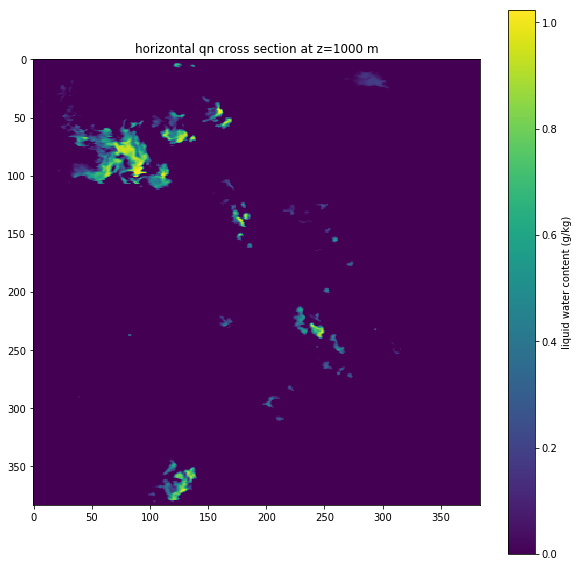

In [15]:
from matplotlib import pyplot as plt
fig,ax =plt.subplots(1,1,figsize=(10,10))
whole_scene=ax.imshow(horiz_cross_sec)
cax=plt.colorbar(whole_scene,ax=ax)
cax.set_label('liquid water content (g/kg)')
title = 'horizontal qn cross section at z=1000 m'
ax.set_title(title);

### zoom in on  the top left corner

Switch from [imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) to 
[pcolormesh](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolormesh) so we can orient the axes along model x,y, and z coordinates.  Note that if y is north/south (north up), then imshow plots the image upside down.

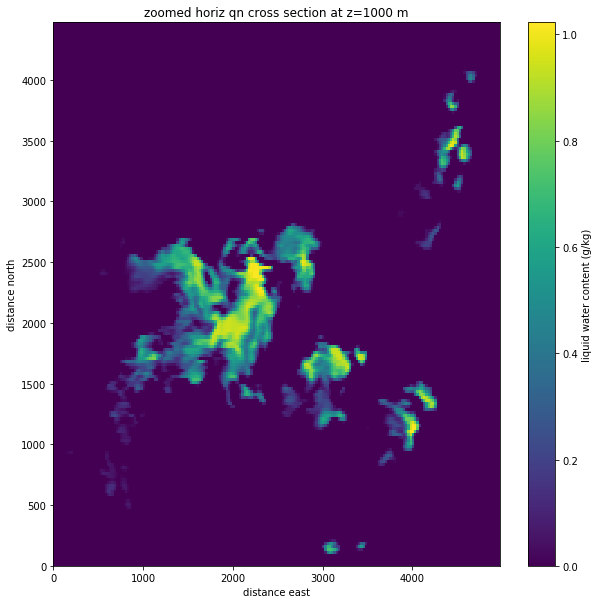

In [16]:
#
# it helps in checking your orientation to make the selection
# have different numbers of rows and columns
#
end_col = 200
end_row = 180
fig,ax =plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],y[:end_row],horiz_cross_sec[:end_row,:end_col])
ax.set(xlabel='distance east',ylabel='distance north')
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water content (g/kg)')
ax.set_title('zoomed horiz qn cross section at z=1000 m');

### Get an x-z vertical cross section along y = 2km

In [17]:
row_number = np.searchsorted(y,2000)  #(y index of 80)

In [18]:
print(f'need to pull x-z field along row {row_number}')

need to pull x-z field along row 80


cross section shape (194, 200)


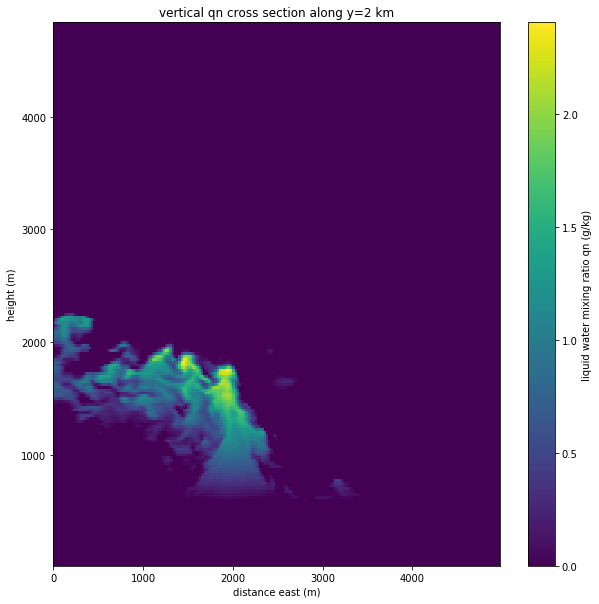

In [20]:
vert_cross_sec = qn[:,row_number,:end_col]
print(f'cross section shape {vert_cross_sec.shape}')
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('liquid water mixing ratio qn (g/kg)')
ax.set_title('vertical qn cross section along y=2 km')
ax.set(xlabel='distance east (m)',ylabel='height (m)');

### Find the vapor mixing ratio along this cross section

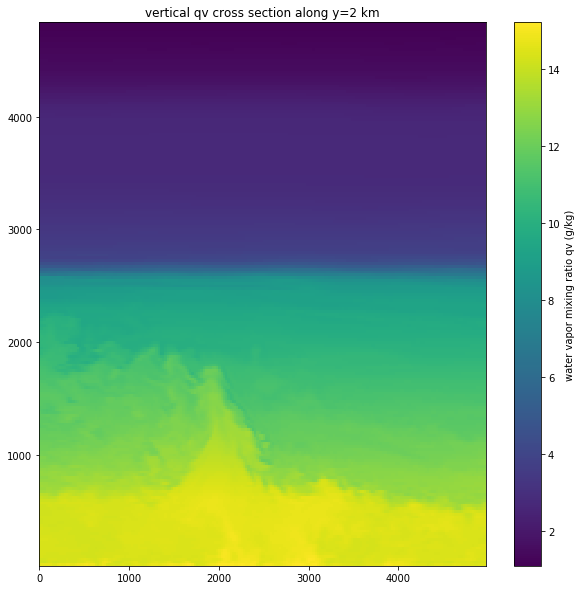

In [11]:
x,y,z,qv = get_var(the_file, 'QV')
vert_cross_sec = qv[:,row_number,:end_col]
fig,ax = plt.subplots(1,1,figsize=(10,10))
image=ax.pcolormesh(x[:end_col],z,vert_cross_sec[:,:end_col])
cax = plt.colorbar(image,ax=ax)
cax.set_label('water vapor mixing ratio qv (g/kg)')
ax.set_title('vertical qv cross section along y=2 km');

### For Wednesday

1\.  Read Thompkins chapter 4 parameterization notes through section 4.7.1


2\.  Hand in a notebook that adds cells to cgilsI.ipynb to:

     * use pcolormesh to plot a vertical cross section of the relative humidity for along y=2 km, x= 0-5 km
     
     * use plot to plot a vertical profile of the horizontal mean RH in for this cross section as a function of height
     
     * use plot to plot a vertical profile of the horizontal standard deviation of RH as a function of height